In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from starfish.set import settings

In [3]:
def var_filter(fisher,lcdm,neff_fixed):
    df=fisher.copy()
    if lcdm:
        df=df.drop('w0',axis=0)
        df=df.drop('w0',axis=1)
        df=df.drop('wa',axis=0)
        df=df.drop('wa',axis=1)
    if neff_fixed:
        df=df.drop('N_eff',axis=0)
        df=df.drop('N_eff',axis=1)

    return df

In [4]:
fisher1=var_filter(pd.read_excel('../data/ELG/fisher.xlsx',header=0,index_col=0),lcdm=False,neff_fixed=False)
fisher2=var_filter(pd.read_excel('../data/jpas_all/valid.xlsx',header=0,index_col=0),lcdm=False,neff_fixed=False)

In [5]:
cov1_valid=pd.DataFrame(np.linalg.inv(fisher1.values)[:settings.cosmo_num,:settings.cosmo_num],index=settings.var_name,columns=settings.var_name)
cov2_valid=pd.DataFrame(np.linalg.inv(fisher2.values)[:settings.cosmo_num,:settings.cosmo_num],index=settings.var_name,columns=settings.var_name)

In [6]:
from getdist import plots
from getdist.gaussian_mixtures import GaussianND

gauss = []
for cov in  [cov1_valid,cov2_valid]:
    g = GaussianND(settings.cosmo_value, cov, is_inv_cov=False, names=settings.var_exp)
    g.paramNames.names[-4].name = r"$\sum m_\nu\;[\mathrm{eV}]$"
    g.paramNames.names[-4].label = ""
    g.names = settings.var_exp[:settings.cosmo_num]
    gauss.append(g)

In [7]:
orders=[r'$h$',r'$\Omega_\mathrm{m,0}$',r'$\Omega_\mathrm{b,0}$',r'$\sigma_8$',r'$n_\mathrm{s}$',r'$\sum m_\nu\;[\mathrm{eV}]$',r'$N_\mathrm{eff}$',r'$w_0$',r'$w_a$']
m=dict(zip(settings.var_exp,settings.cosmo_value))

In [8]:
palette=sns.color_palette(['chocolate','mediumseagreen',])
palette

[(0.8235294117647058, 0.4117647058823529, 0.11764705882352941),
 (0.23529411764705882, 0.7019607843137254, 0.44313725490196076)]

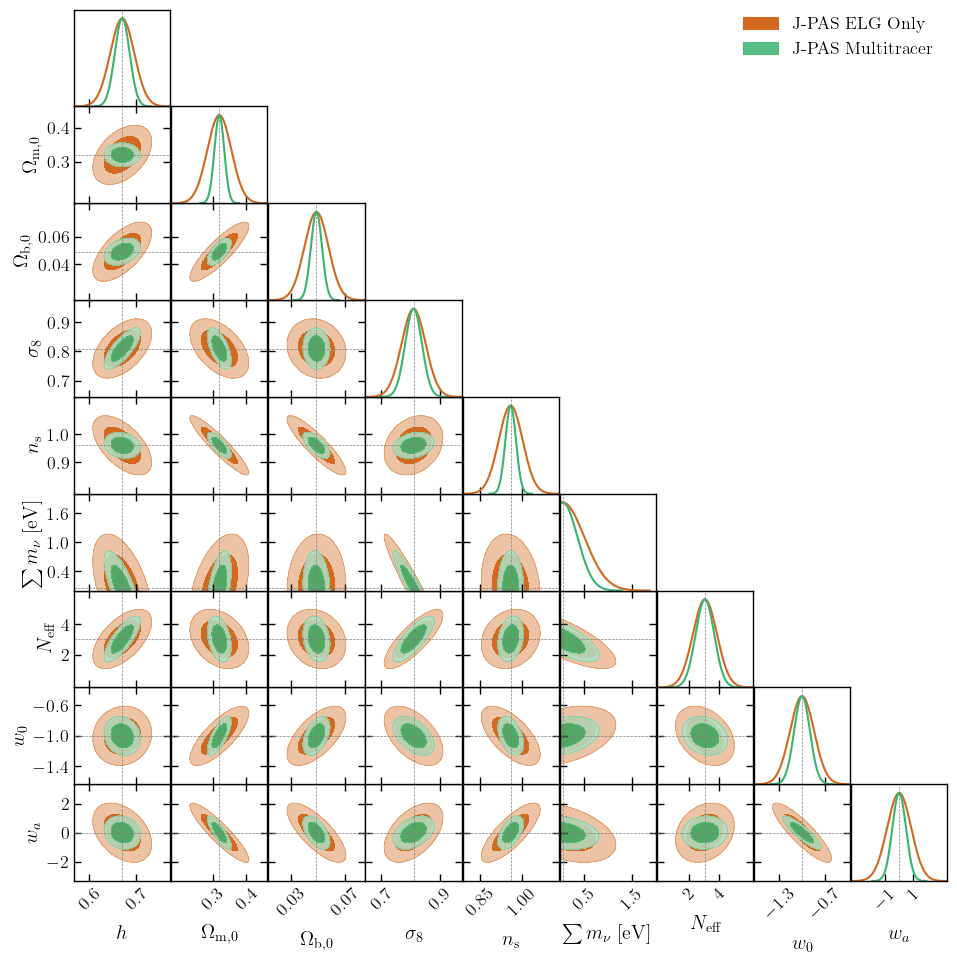

In [9]:
sns.set_context('paper',font_scale=2)
ploter=plots.get_subplot_plotter(width_inch=10,rc_sizes=True)
ploter.settings.tight_layout=True
ploter.settings.axis_tick_x_rotation=45
ploter.settings.figure_legend_frame=False
ploter.triangle_plot(
    gauss,
    params=orders,
    param_limits={r'$\sum m_\nu\;[\mathrm{eV}]$':(0,2)},
    markers=m,
    marker_args={'color':'gray'},
    filled=True,
    legend_labels=['J-PAS ELG Only','J-PAS Multitracer'],
    contour_colors=palette,
    contour_lws=[1.5,1.5,1.5,1.5],
    legend_loc='upper right')

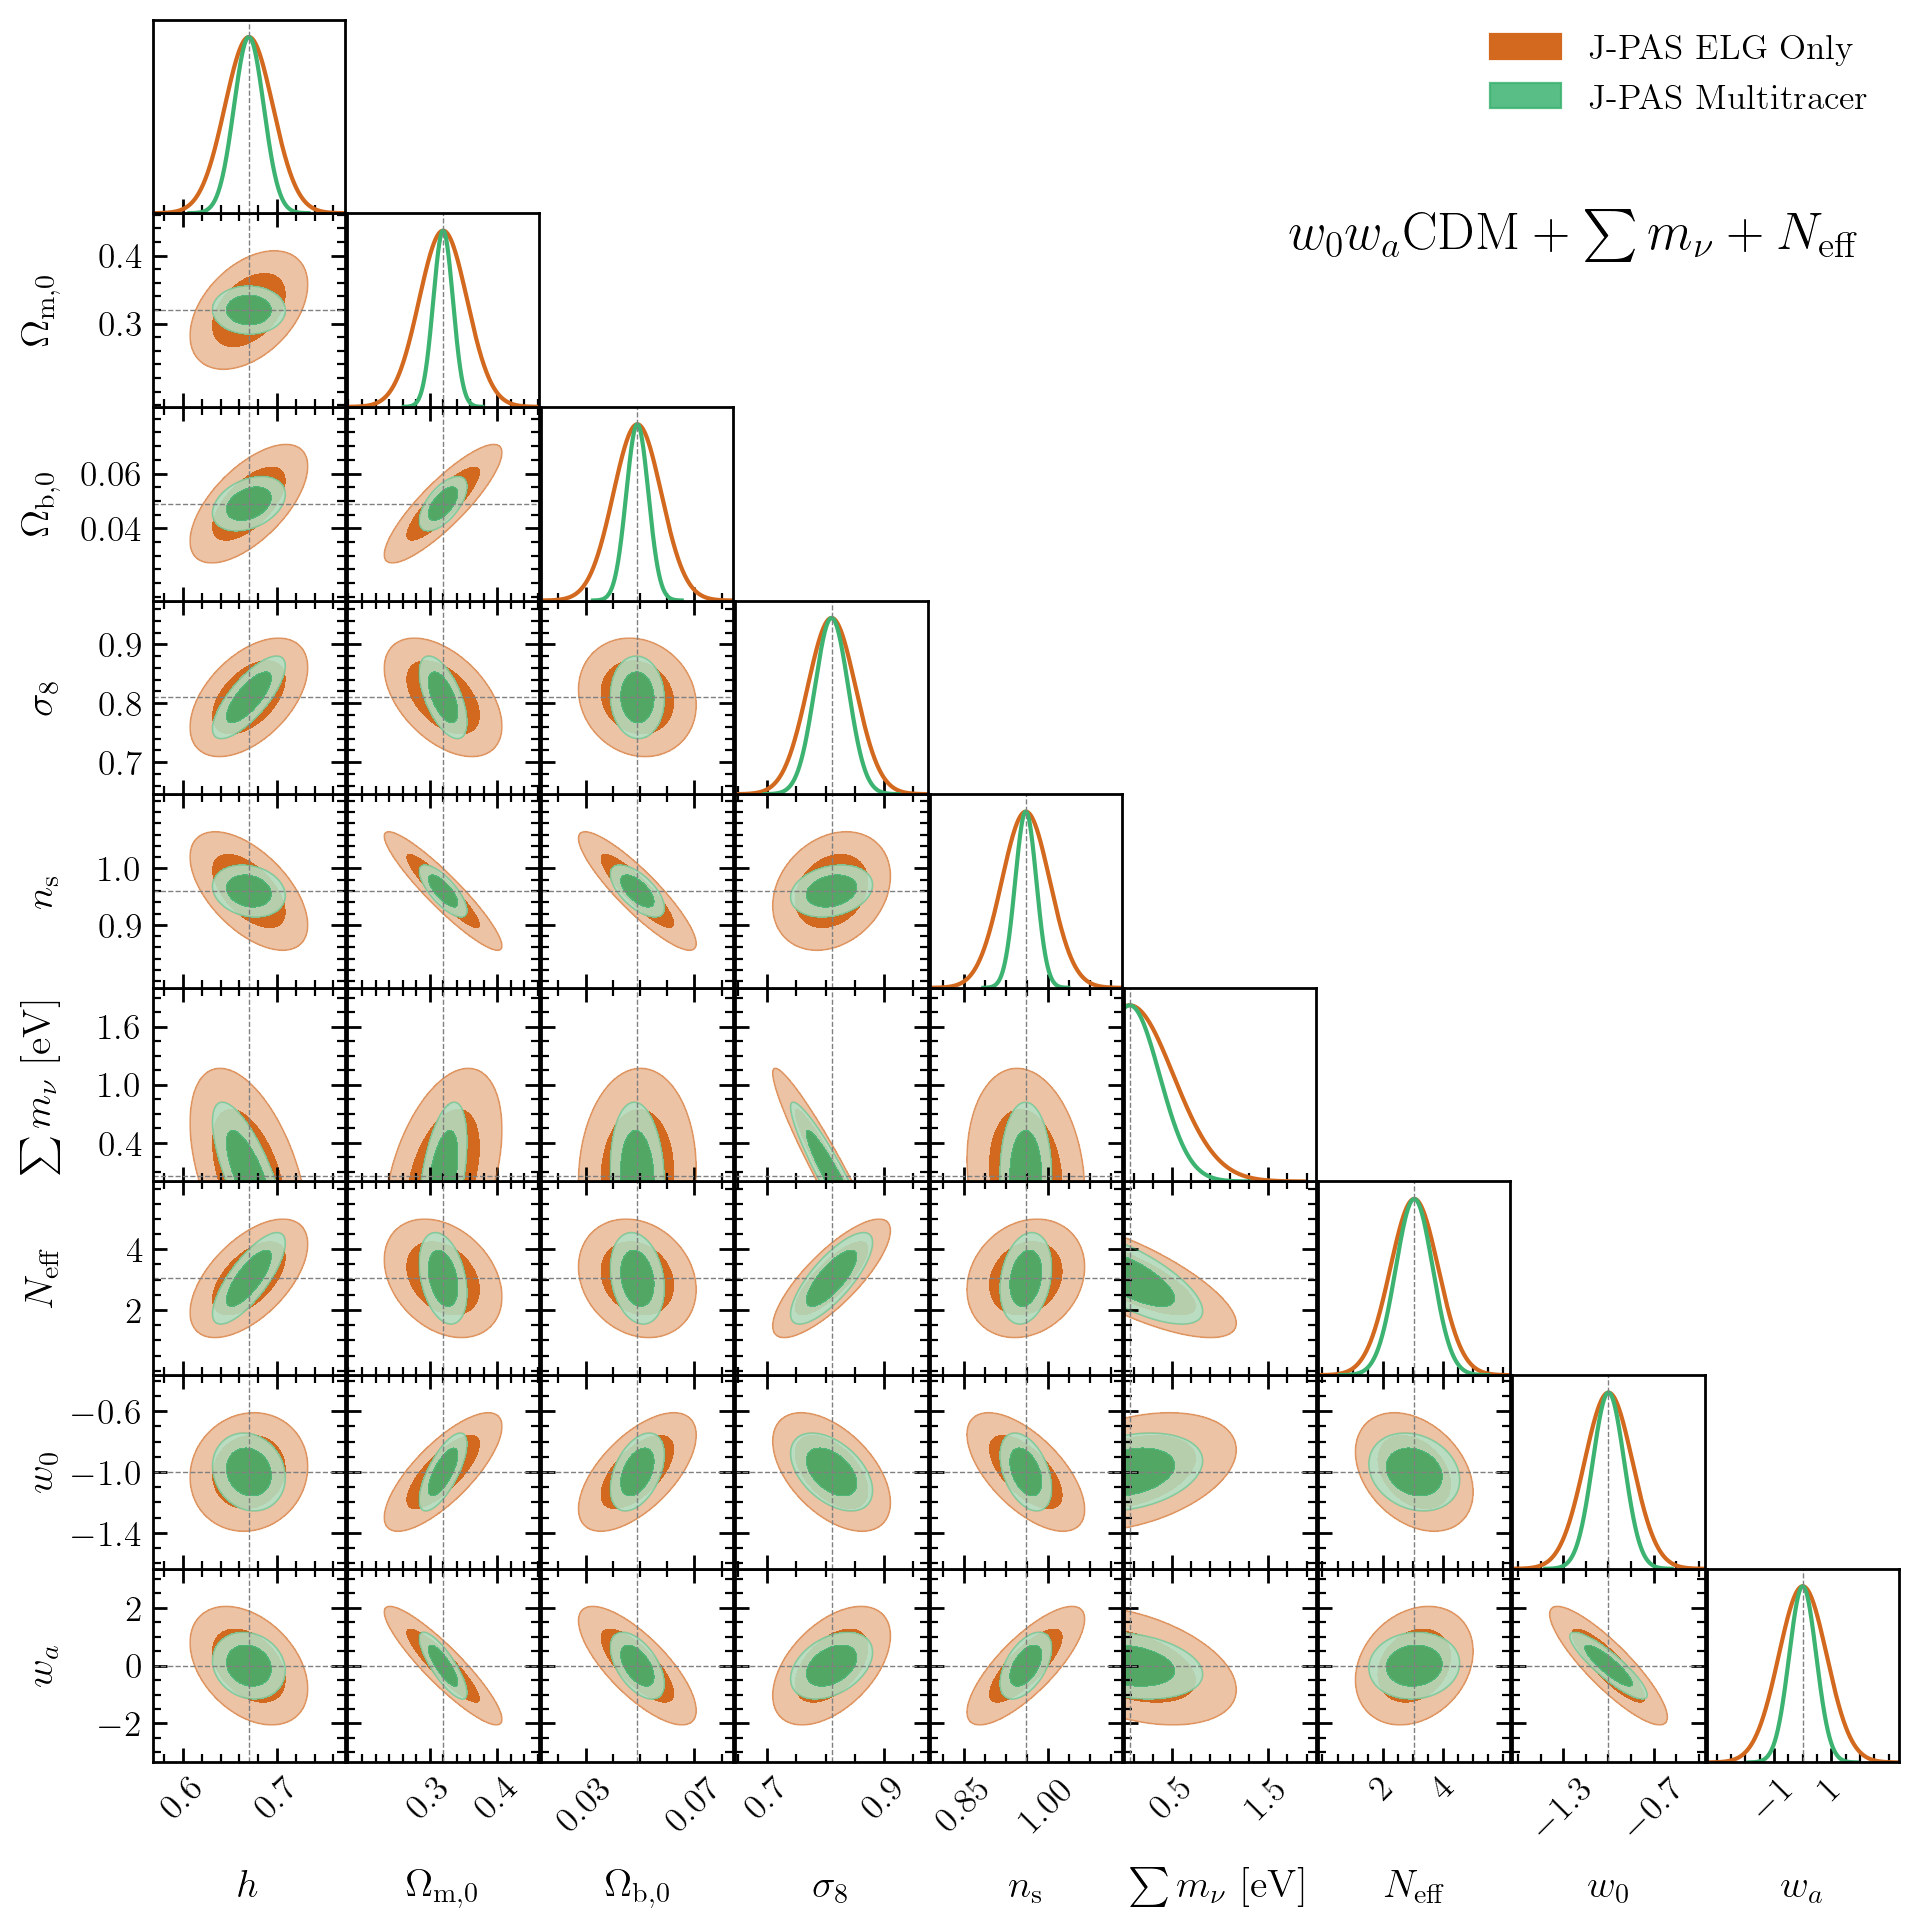

In [10]:
ploter.fig.set_dpi(200)
ploter.fig.align_labels()
for ax in ploter.fig.axes:
    ax.minorticks_on()
    ax.tick_params(which='major',length=5)
    ax.tick_params(which='minor',length=3)
y=len(orders)
axes=[]
start=0
for x in range(len(orders)):
    axes.append(ploter.fig.axes[start:start+y])
    start+=y
    y-=1
for col in axes:
    col[-1].yaxis.minorticks_off()
ploter.fig.text(0.95,0.85,r'$w_0w_a\mathrm{CDM}+\sum m_\nu+N_\mathrm{eff}$',horizontalalignment='right', verticalalignment='bottom')
ploter.fig

In [11]:
ploter.export('jelg+jmul-all-w0wacdm-free.pdf','../fig/')